In [52]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [53]:
# Load MNIST

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(f'Train shape = {x_train.shape}')
print(f'Test shape = {x_test.shape}')

Train shape = (60000, 28, 28)
Test shape = (10000, 28, 28)


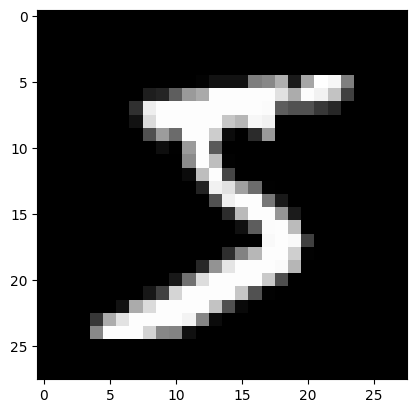

In [54]:
plt.imshow(x_train[0], cmap='gray')

In [55]:
# Manual flatten

x_train_flatten = x_train.reshape(x_train.shape[0], -1)
x_test_flatten = x_test.reshape(x_test.shape[0], -1)

print(x_test_flatten.shape)

(10000, 784)


In [56]:
'''
Splitting
Train 60k | Test 10k
-> Train 48k | Val 12k | Test 10k
'''

x_train_flatten, x_val_flatten, y_train, y_val = train_test_split(x_train_flatten, y_train, test_size=0.2, random_state=2)

print(f'Train = {x_train_flatten.shape[0]} | Val = {x_val_flatten.shape[0]}') 

print(f'Y values = {np.unique(y_test)} | shape = {np.unique(y_test).shape[0]}')

Train = 48000 | Val = 12000
Y values = [0 1 2 3 4 5 6 7 8 9] | shape = 10


In [61]:
# Model

input_shape = x_train_flatten.shape[1]
n_classes = np.unique(y_test).shape[0]

print(f'Input shape = {input_shape} | output shape = {n_classes}')

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_shape)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(n_classes, activation='linear')
])

learning_rate = 0.01
epochs = 100
batch_size = 16

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train_flatten, y_train, validation_data=(x_val_flatten, y_val), epochs=epochs, batch_size=batch_size)

Input shape = 784 | output shape = 10
Epoch 1/100
3000/3000 [==============================] - 8s 3ms/step - loss: 3.1300 - accuracy: 0.2473 - val_loss: 2.2766 - val_accuracy: 0.1246
Epoch 2/100
3000/3000 [==============================] - 7s 2ms/step - loss: 2.3339 - accuracy: 0.1301 - val_loss: 2.2618 - val_accuracy: 0.1247
Epoch 3/100
3000/3000 [==============================] - 7s 2ms/step - loss: 2.2674 - accuracy: 0.1318 - val_loss: 2.2223 - val_accuracy: 0.1319
Epoch 4/100
3000/3000 [==============================] - 7s 2ms/step - loss: 2.2527 - accuracy: 0.1321 - val_loss: 2.2071 - val_accuracy: 0.1384
Epoch 5/100
3000/3000 [==============================] - 7s 2ms/step - loss: 2.2306 - accuracy: 0.1397 - val_loss: 2.1397 - val_accuracy: 0.1648
Epoch 6/100
3000/3000 [==============================] - 7s 2ms/step - loss: 2.2197 - accuracy: 0.1401 - val_loss: 2.1829 - val_accuracy: 0.1523
Epoch 7/100
3000/3000 [==============================] - 7s 2ms/step - loss: 2.2516 - accura

KeyboardInterrupt: 

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()